<a href="https://colab.research.google.com/github/AichaELMouta/Car_Price_Prediction/blob/main/car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nehalbirla/vehicle-dataset-from-cardekho")

print("Path to dataset files:", path)

100%|██████████| 292k/292k [00:00<00:00, 641kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/nehalbirla/vehicle-dataset-from-cardekho/versions/4


In [2]:
    from google.colab import drive
    drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
#import all regression models to comparing metric values
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn import metrics

Loading Dataset from csv file to pandas dataframe

In [4]:
car_data=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/car data.csv")

In [5]:
#Inspecting data
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
car_data.shape

(301, 9)

In [7]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [24]:
#show duplicated rows
car_data[car_data.duplicated(keep=False)]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
15,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
51,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [25]:
#drop duplicated rows
car_data.drop_duplicates(inplace=True)
car_data = car_data.reset_index(drop=True)
car_data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
294,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
295,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
296,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
297,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [8]:
car_data.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [26]:
car_data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [27]:
car_data.Car_Name.value_counts()

,count
Car_Name,
city,26
corolla altis,16
verna,14
brio,10
fortuner,10
...,...
Honda Activa 125,1
Hero Hunk,1
Hero Ignitor Disc,1


In [28]:
#checking the categorical data
print(car_data.Fuel_Type.value_counts())
print(car_data.Transmission.value_counts())
print(car_data.Seller_Type.value_counts())

Fuel_Type
Petrol    239
Diesel     58
CNG         2
Name: count, dtype: int64
Transmission
Manual       260
Automatic     39
Name: count, dtype: int64
Seller_Type
Dealer        193
Individual    106
Name: count, dtype: int64


In [29]:
car_data.Owner.value_counts()

,count
Owner,
0,288
1,10
3,1


Data Analysis and Visualization

In [14]:
# statistical measures of the dataset
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


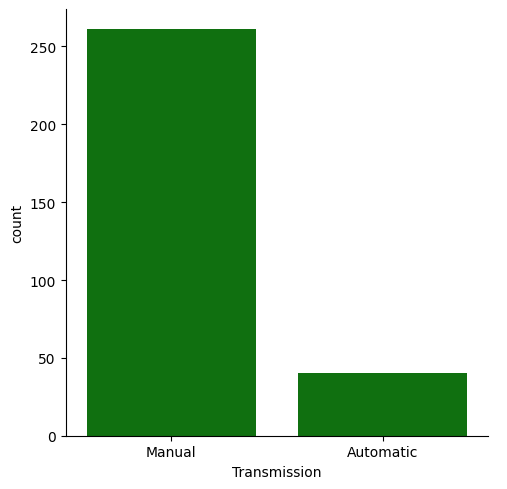

In [15]:
# number of values for each brand
sns.catplot(x='Transmission', data=car_data, kind = 'count', color = 'green')


<Axes: xlabel='Seller_Type', ylabel='Selling_Price'>

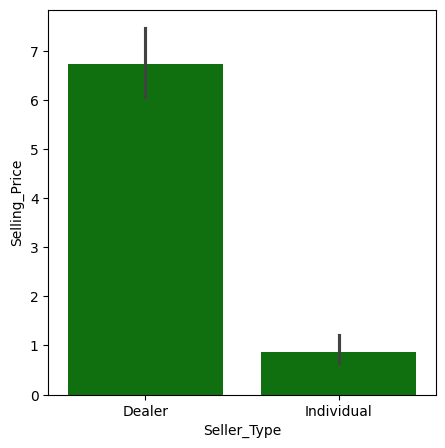

In [17]:
# Price  vs Brand
plot = plt.figure(figsize=(5,5))
sns.barplot(x='Seller_Type', y = 'Selling_Price', data = car_data, color = 'green')


<Axes: xlabel='Price', ylabel='Model'>

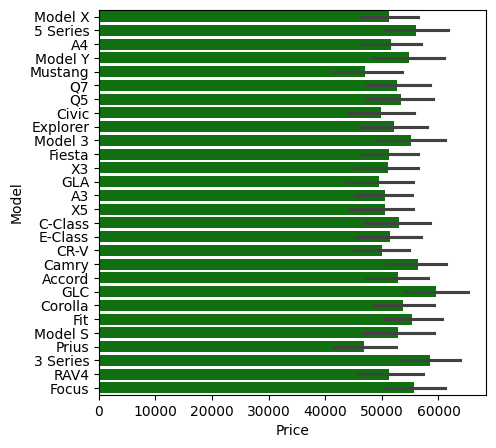

In [ ]:
# Price  vs Model
plot = plt.figure(figsize=(5,5))
sns.barplot(x='Price', y = 'Model', data = car_data, color = 'green')

<Axes: xlabel='Fuel_Type', ylabel='Price'>

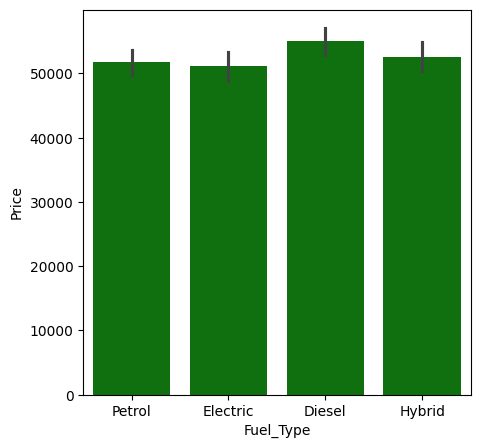

In [ ]:
# Price  vs Fuel Type
plot = plt.figure(figsize=(5,5))
sns.barplot(x='Fuel_Type', y = 'Price', data = car_data, color = 'green')

<Axes: xlabel='Transmission', ylabel='Price'>

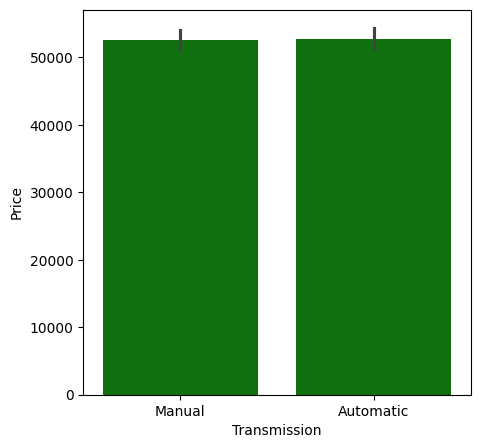

In [ ]:
# Price  vs Transmission
plot = plt.figure(figsize=(5,5))
sns.barplot(x='Transmission', y = 'Price', data = car_data, color = 'green')

<Axes: xlabel='Condition', ylabel='Price'>

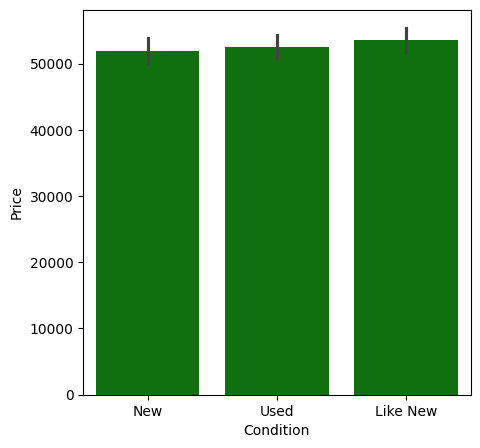

In [ ]:
# Price  vs Condition
plot = plt.figure(figsize=(5,5))
sns.barplot(x='Condition', y = 'Price', data = car_data, color = 'green')

In [ ]:
car_data = car_data.drop(columns=['Car ID'])

In [ ]:
print(car_data.Year.value_counts())

Year
2020    122
2016    118
2003    118
2022    112
2021    112
2012    111
2007    110
2002    110
2008    109
2014    109
2001    109
2018    106
2019    103
2023    103
2005    103
2011    101
2004    100
2017     97
2010     95
2013     95
2000     93
2009     90
2015     88
2006     86
Name: count, dtype: int64


***Data*** **Encoding**
```
# This is formatted as code
```



In [ ]:
X = car_data.drop(columns='Price', axis=1)
Y = car_data['Price']

In [ ]:
X

,Brand,Year,Engine_size,Fuel_Type,Transmission,Mileage,Condition,Model
0,Tesla,2016,2.3,Petrol,Manual,114832,New,Model X
1,BMW,2018,4.4,Electric,Manual,143190,Used,5 Series
2,Audi,2013,4.5,Electric,Manual,181601,New,A4
3,Tesla,2011,4.1,Diesel,Automatic,68682,New,Model Y
4,Ford,2009,2.6,Diesel,Manual,223009,Like New,Mustang
...,...,...,...,...,...,...,...,...
2495,Audi,2020,2.4,Petrol,Automatic,22650,Like New,Q5
2496,Audi,2001,5.7,Hybrid,Manual,77701,Like New,A3
2497,Ford,2021,1.1,Hybrid,Manual,272827,Like New,Fiesta
2498,Audi,2002,4.5,Diesel,Manual,229164,Like New,Q5


In [ ]:
Y

,Price
0,26613.92
1,14679.61
2,44402.61
3,86374.33
4,73577.10
...,...
2495,61384.10
2496,24710.35
2497,29902.45
2498,46085.67


In [ ]:
encoder = LabelEncoder()
X['Brand'] = encoder.fit_transform(X['Brand'])
X['Model'] = encoder.fit_transform(X['Model'])
X['Condition'] = encoder.fit_transform(X['Condition'])
X['Fuel_Type'] = encoder.fit_transform(X['Fuel_Type'])
X['Transmission']= encoder.fit_transform(X['Transmission'])

In [ ]:
X

,Brand,Year,Engine_size,Fuel_Type,Transmission,Mileage,Condition,Model
0,5,2016,2.3,3,1,114832,1,19
1,1,2018,4.4,1,1,143190,2,1
2,0,2013,4.5,1,1,181601,1,3
3,5,2011,4.1,0,0,68682,1,20
4,2,2009,2.6,0,1,223009,0,21
...,...,...,...,...,...,...,...,...
2495,0,2020,2.4,3,0,22650,0,23
2496,0,2001,5.7,2,1,77701,0,2
2497,2,2021,1.1,2,1,272827,0,12
2498,0,2002,4.5,0,1,229164,0,23


**Data Scaling**


In [ ]:
scaler = MinMaxScaler()
X['Mileage']= scaler.fit_transform(X[['Mileage']])


In [ ]:
X

,Brand,Year,Engine_size,Fuel_Type,Transmission,Mileage,Condition,Model
0,5,2016,2.3,3,1,0.382785,1,19
1,1,2018,4.4,1,1,0.477326,2,1
2,0,2013,4.5,1,1,0.605384,1,3
3,5,2011,4.1,0,0,0.228927,1,20
4,2,2009,2.6,0,1,0.743432,0,21
...,...,...,...,...,...,...,...,...
2495,0,2020,2.4,3,0,0.075462,0,23
2496,0,2001,5.7,2,1,0.258995,0,2
2497,2,2021,1.1,2,1,0.909519,0,12
2498,0,2002,4.5,0,1,0.763952,0,23


**Splitting** **Data**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
X_train.shape

(2000, 8)

In [ ]:
X_test.shape

(500, 8)

**Model Training**

*Linear Regression*


In [ ]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [ ]:
lr_predict_train = lr.predict(X_train)
lr_predict_test = lr.predict(X_test)

In [ ]:
mae_tr = metrics.mean_absolute_error(Y_train, lr_predict_train)
rmse_tr_lr = np.sqrt(metrics.mean_squared_error(Y_train, lr_predict_train))
mae_ts = metrics.mean_absolute_error(Y_test, lr_predict_test)
rmse_ts = np.sqrt(metrics.mean_squared_error(Y_test, lr_predict_test))
print("MAE of train data:", mae_tr)
print("MAE of test data:", mae_ts)
print("RMSE of train data:", rmse_tr_lr)
print("RMSE of test data:", rmse_ts)


MAE of train data: 23636.796720469178
MAE of test data: 23602.175199965903
RMSE of train data: 27274.101274900582
RMSE of test data: 27118.632029510904


*Lasso* *Regression*

In [ ]:
lasso_model = Lasso()
lasso_model.fit(X_train, Y_train)

Lasso()

In [ ]:
lasso_model_predict_train = lasso_model.predict(X_train)
lasso_model_predict_test = lasso_model.predict(X_test)


In [ ]:
mae_tr = metrics.mean_absolute_error(Y_train, lasso_model_predict_train)
rmse_tr_lasso = np.sqrt(metrics.mean_squared_error(Y_train, lasso_model_predict_train))
mae_ts = metrics.mean_absolute_error(Y_test, lasso_model_predict_test)
rmse_ts = np.sqrt(metrics.mean_squared_error(Y_test, lasso_model_predict_test))
print("MAE of train data:", mae_tr)
print("MAE of test data:", mae_ts)
print("RMSE of train data:", rmse_tr_lasso)
print("RMSE of test data:", rmse_ts)

MAE of train data: 23636.8501020597
MAE of test data: 23602.01740303544
RMSE of train data: 27274.10163392893
RMSE of test data: 27118.667550542435


*Ridge Regression*

In [ ]:
ridge_model = Ridge()
ridge_model.fit(X_train, Y_train)

Ridge()

In [ ]:
ridge_model_predict_train = ridge_model.predict(X_train)
ridge_model_predict_test = ridge_model.predict(X_test)

In [ ]:
mae_tr = metrics.mean_absolute_error(Y_train, ridge_model_predict_train)
rmse_tr_ridge = np.sqrt(metrics.mean_squared_error(Y_train, ridge_model_predict_train))
mae_ts = metrics.mean_absolute_error(Y_test, lr_predict_test)
rmse_ts = np.sqrt(metrics.mean_squared_error(Y_test, lr_predict_test))
print("MAE of train data:", mae_tr)
print("MAE of test data:", mae_ts)
print("RMSE of train data:", rmse_tr_ridge)
print("RMSE of test data:", rmse_ts)

MAE of train data: 23636.808206451475
MAE of test data: 23602.175199965903
RMSE of train data: 27274.101299405964
RMSE of test data: 27118.632029510904



*ElasticNet Regression*




In [ ]:
modelelastic = ElasticNet(alpha = 1.0, l1_ratio=0.5)
modelelastic.fit(X_train, Y_train)

ElasticNet()

In [ ]:
modelelastic_predict_train = modelelastic.predict(X_train)
modelelastic_predict_test = modelelastic.predict(X_test)

In [ ]:
mae_tr_els = metrics.mean_absolute_error(Y_train, modelelastic_predict_train)
rmse_tr_els = np.sqrt(metrics.mean_squared_error(Y_train, modelelastic_predict_train))
mae_els = metrics.mean_absolute_error(Y_test, modelelastic_predict_test)
rmse_els = np.sqrt(metrics.mean_squared_error(Y_test, modelelastic_predict_test))
print("MAE of train data:", mae_tr_els)
print("MAE of test data:", mae_els)
print("RMSE of train data:", rmse_tr_els)
print("RMSE of test data:", rmse_els)

MAE of train data: 23640.87719126035
MAE of test data: 23593.762523964553
RMSE of train data: 27276.097504929126
RMSE of test data: 27123.096514892335


In [ ]:
print("RMSE LR:", rmse_tr_lr)
print("RMSE Lasso:", rmse_tr_lasso)
print("RMSE Ridge:", rmse_tr_ridge)
print("RMSE ElasticNet:", rmse_tr_els)


RMSE LR: 27274.101274900582
RMSE Lasso: 27274.10163392893
RMSE Ridge: 27274.101299405964
RMSE ElasticNet: 27276.097504929126


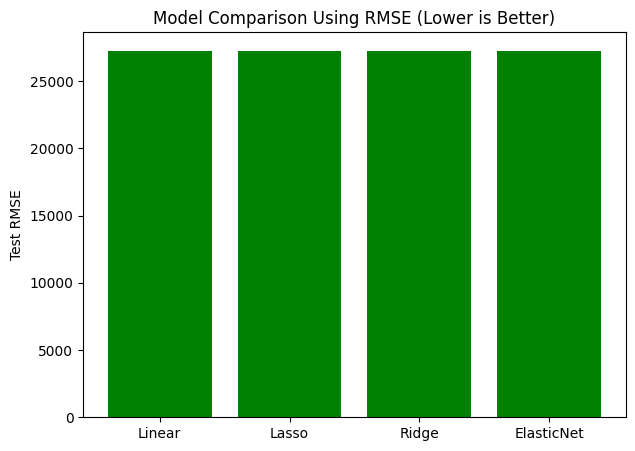

In [ ]:
rmse_values = {
    'Linear': rmse_tr_lr,
    'Lasso': rmse_tr_lasso,
    'Ridge': rmse_tr_ridge,
    'ElasticNet': rmse_tr_els
}

plt.figure(figsize=(7,5))
plt.bar(rmse_values.keys(), rmse_values.values(), color = 'green')
plt.ylabel("Test RMSE")
plt.title("Model Comparison Using RMSE (Lower is Better)")
plt.show()

Based on linear regression models, Ridge, Lasso and ElasticNet and thier RMSE, the best model for predicting car prices in this dataset is Ridge Model. Both Ridge and linear regression show the lowest and nearly identical RMSE score, indicationg that the model's prediction error is approximately ±27,274 dollars. This means the model typically predicts car prices with an average deviation of about 27.274 from the actual value.